In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris    #Import scikit-learn & loading dataset
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score
from sklearn import metrics
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
iris_db = load_iris()
iris_db

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# print the label species(setosa, versicolor,virginica)
print(iris_db.target_names)

# print the names of the four features
print(iris_db.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# print the iris data (top 5 records)
print(iris_db.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris_db.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Preview Of data
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [5]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
df=pd.DataFrame({
    'sepal_length':iris_db.data[:,0],
    'sepal_width':iris_db.data[:,1],
    'petal_length':iris_db.data[:,2],
    'petal_width':iris_db.data[:,3],
    'Classes':iris_db.target
})
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Classes
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df['Classes'].value_counts()

0    50
1    50
2    50
Name: Classes, dtype: int64

In [8]:
X = df.drop('Classes', axis=1)
y = df['Classes']

## Data Visualization

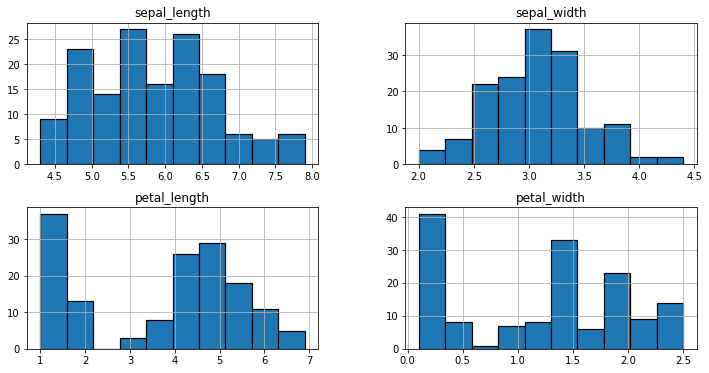

In [9]:
X.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

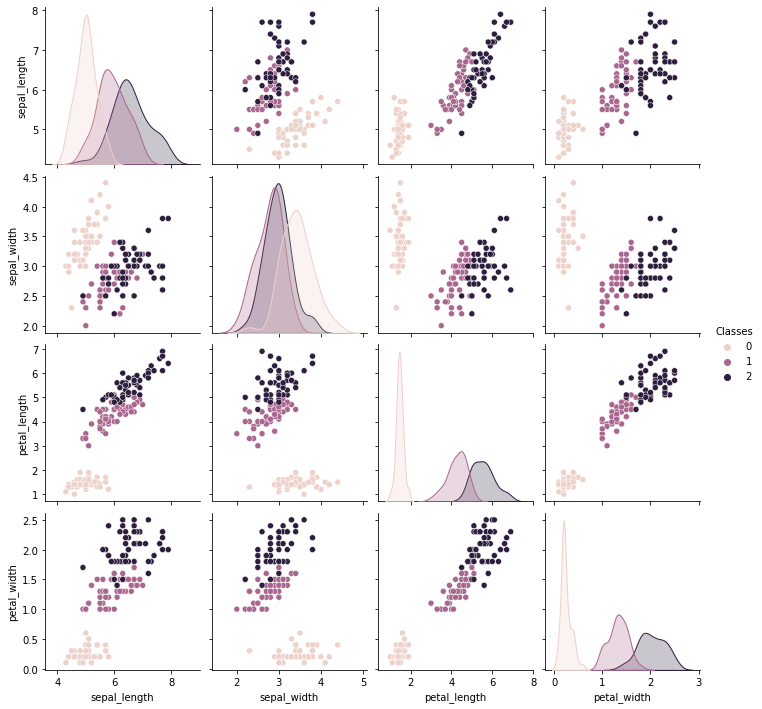

In [10]:
sns.pairplot(df, hue='Classes')
plt.show()

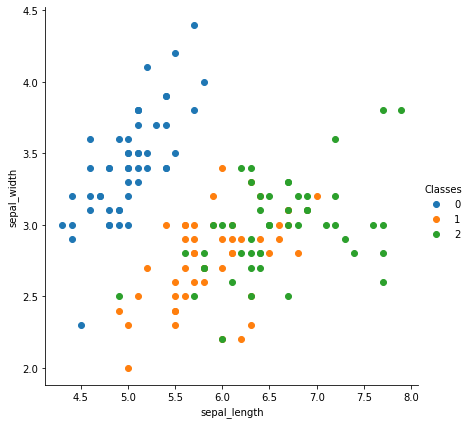

In [11]:
sns.FacetGrid(df, hue="Classes", height=6) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

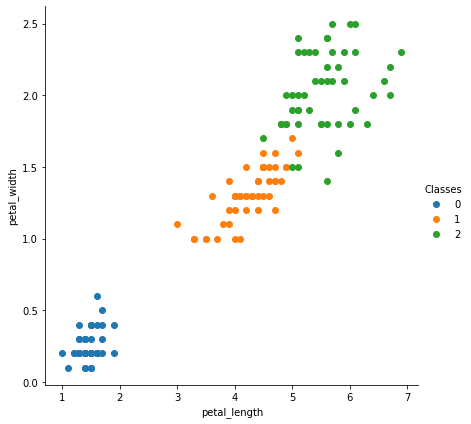

In [12]:
sns.FacetGrid(df, hue="Classes", height=6) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

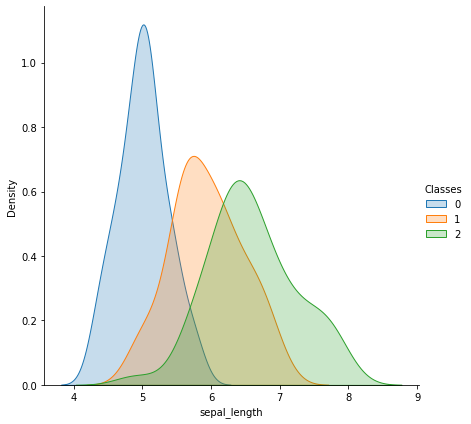

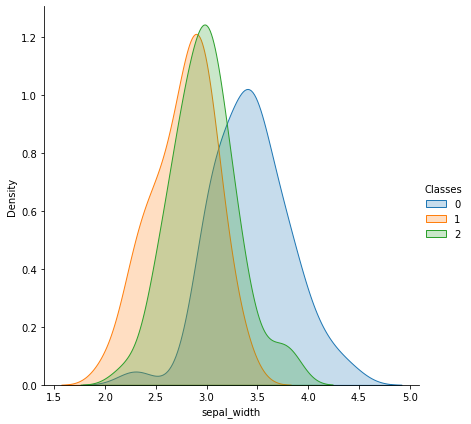

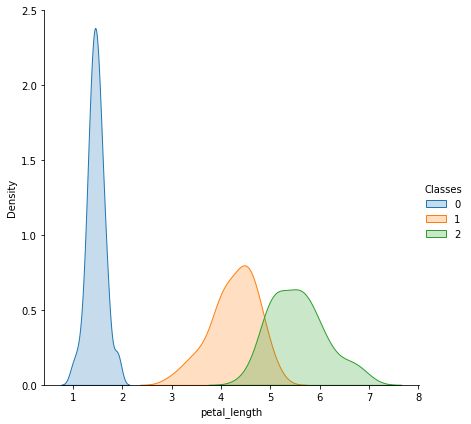

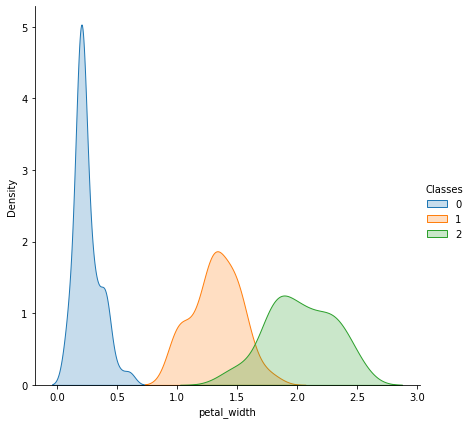

In [13]:
for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.FacetGrid(df, hue="Classes", height=6,) \
    .map(sns.kdeplot, i,shade=True) \
    .add_legend()

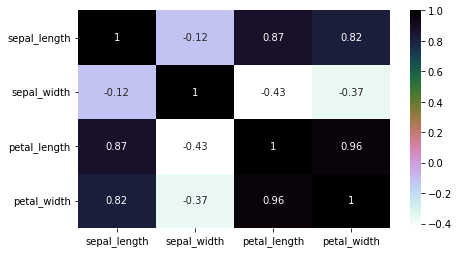

In [14]:
plt.figure(figsize=(7,4)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws heatmap with input as the correlation matrix calculted by(X.corr())
plt.show()

## Training & Testing of data using  Logistics Regression & Random Forest Model

In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24) # 75% training and 25% test

In [16]:
#Import LogisticRegression
from sklearn.linear_model import LogisticRegression
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


In [17]:
model = LogisticRegression()

#Train the model using the training sets
model.fit(X_train, y_train)

y1_pred=model.predict(X_test)

ac=accuracy_score(y_test,y1_pred)
print("Accuracy_Score",ac)

print("SCORE",model.score(X_test,y_test))
  
cm=confusion_matrix(y_test,y1_pred)
print('Confusion metrics')
print(cm)

print("CLASSIFICATION REPORT")
report=classification_report(y_test,y1_pred)
print('\n')
print(report)

#print(metrics.accuracy_score(y_test, y1_pred))

Classes_idx = model.predict([[6.5, 3. , 5.2, 2.]])[0]
iris_db.target_names[Classes_idx]

Accuracy_Score 0.9736842105263158
SCORE 0.9736842105263158
Confusion metrics
[[12  0  0]
 [ 0  7  1]
 [ 0  0 18]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.95      1.00      0.97        18

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



'virginica'

In [18]:
#Create a Random Forest Model
Model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
Model.fit(X_train,y_train)

y2_pred=Model.predict(X_test)

ac=accuracy_score(y_test,y2_pred)
print("Accuracy_Score",ac)

print("SCORE",model.score(X_test,y_test))
  
cm=confusion_matrix(y_test,y1_pred)
print('Confusion metrics')
print(cm)

print("CLASSIFICATION REPORT")
report=classification_report(y_test,y2_pred)
print('\n')
print(report)


Classes_idx = model.predict([[6.5, 3. , 5.2, 2.]])[0]
iris_db.target_names[Classes_idx]

Accuracy_Score 0.9736842105263158
SCORE 0.9736842105263158
Confusion metrics
[[12  0  0]
 [ 0  7  1]
 [ 0  0 18]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.95      1.00      0.97        18

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



'virginica'